<a href="https://colab.research.google.com/github/Aadya1504/Deep-Learning/blob/main/CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from tensorflow.keras import utils
import itertools

In [2]:
data = np.load('/content/ORL_faces.npz')

In [3]:
x_train = data['trainX']
x_train = np.array(x_train, dtype='float32') / 255


In [4]:

x_test = data['testX']
x_test = np.array(x_test, dtype='float32') / 255

In [5]:
y_train = data['trainY']
y_test = data['testY']

In [6]:
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (240, 10304)
y_train shape: (240,)
x_test shape: (160, 10304)


In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.05, random_state=1234)

In [8]:
im_rows = 112
im_cols = 92
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(-1, *im_shape)
x_test = x_test.reshape(-1, *im_shape)
x_valid = x_valid.reshape(-1, *im_shape)


In [9]:
y_train = to_categorical(y_train, num_classes=20)
y_test = to_categorical(y_test, num_classes=20)
y_valid = to_categorical(y_valid, num_classes=20)

In [10]:
print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)
print('y_test shape:', y_test.shape)

x_train shape: (228, 112, 92, 1)
x_valid shape: (12, 112, 92, 1)
x_test shape: (160, 112, 92, 1)
y_train shape: (228, 20)
y_valid shape: (12, 20)
y_test shape: (160, 20)


In [11]:
cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu'),  # No input_shape needed here
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')  # 20 is the number of output classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [13]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 106, 86, 36)         │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 53, 43, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 49, 39, 54)          │          48,654 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 19, 54)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 24624)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2024)                │      49,841,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,073,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,500,114 (200.27 MB)

 Trainable params: 52,500,114 (200.27 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=64,
    epochs=5, verbose=2,
    validation_data=(np.array(x_valid), np.array(y_valid)),
)

Epoch 1/5
4/4 - 15s - 4s/step - accuracy: 0.0395 - loss: 3.3922 - val_accuracy: 0.0833 - val_loss: 3.0573
Epoch 2/5
4/4 - 20s - 5s/step - accuracy: 0.0526 - loss: 3.0052 - val_accuracy: 0.0833 - val_loss: 3.0063
Epoch 3/5
4/4 - 20s - 5s/step - accuracy: 0.0526 - loss: 2.9991 - val_accuracy: 0.0833 - val_loss: 3.0030
Epoch 4/5
4/4 - 21s - 5s/step - accuracy: 0.0702 - loss: 2.9791 - val_accuracy: 0.0000e+00 - val_loss: 3.0180
Epoch 5/5
4/4 - 20s - 5s/step - accuracy: 0.0746 - loss: 2.9642 - val_accuracy: 0.0000e+00 - val_loss: 2.9972


In [15]:
scor = cnn_model.evaluate(np.array(x_test), np.array(y_test), verbose=0)

In [ ]:
print('Test loss: {:.4f}'.format(scor[0]))
print('Test accuracy: {:.4f}'.format(scor[1]))

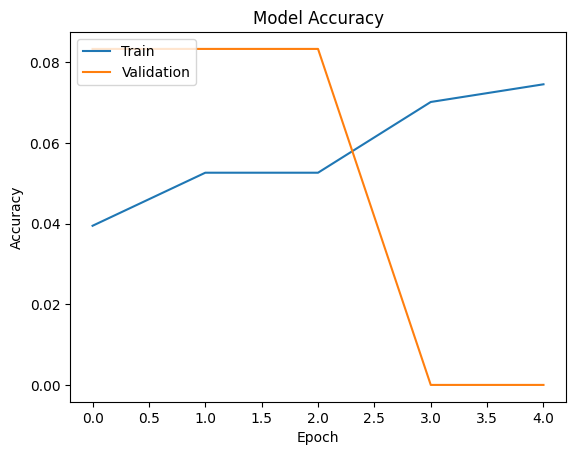

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

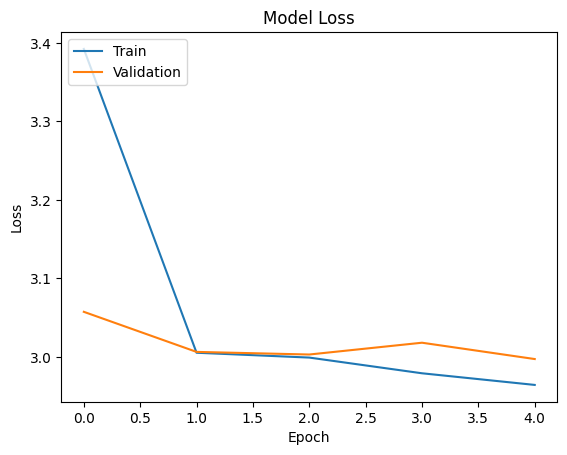

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()